In [103]:
from sklearn.datasets import load_digits
import pandas as pd

dataset=load_digits()
dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [104]:
dataset.data.shape

(1797, 64)

<Figure size 640x480 with 0 Axes>

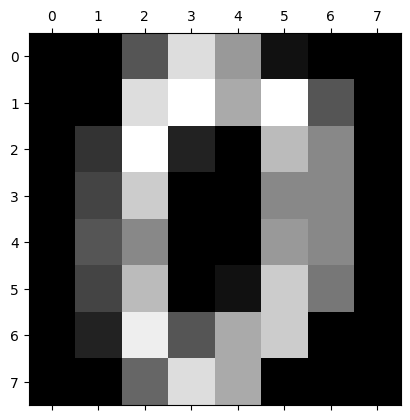

In [105]:
from matplotlib import pyplot as plt
plt.gray()
plt.matshow(dataset.data[0].reshape(8,8))

In [106]:
df=pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [107]:
dataset.target

array([0, 1, 2, ..., 8, 9, 8])

In [108]:
X=df
y=dataset.target

In [109]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [110]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled, y, test_size=0.2,random_state=30)


In [111]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)


0.9722222222222222

In [112]:
from sklearn.decomposition import PCA

pca= PCA(0.95)
X_pca=pca.fit_transform(X)
X_pca.shape



(1797, 29)

In [113]:
pca.explained_variance_ratio_
pca.n_components_

29

In [114]:
X_train_pca,X_test_pca,y_train,y_test= train_test_split(X_pca, y, test_size=0.2,random_state=30)


In [115]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=100)
model.fit(X_train_pca,y_train)
model.score(X_test_pca,y_test)


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9722222222222222

In [116]:
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X)
X_pca.shape

(1797, 2)

In [117]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771])

In [118]:
X_train_pca,X_test_pca,y_train,y_test=train_test_split(X_pca,y,test_size=0.2,random_state=30)

model=LogisticRegression(max_iter=1000)
model.fit(X_train_pca,y_train)
model.score(X_test_pca,y_test)

0.6083333333333333